# Princinpal Component Analysis

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
from datasets import load_dataset
import plotly
import plotly.graph_objs as go
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.simplefilter('ignore')

In [ ]:
a b
a+b = c

# Dimension!!!

## What is a dimension?
- Unique "directions" of your features.

## What is dimension reduction?
- Reducing dimensions to capture most information.

## Why is it useful?
- Sometimes there can be too many features.

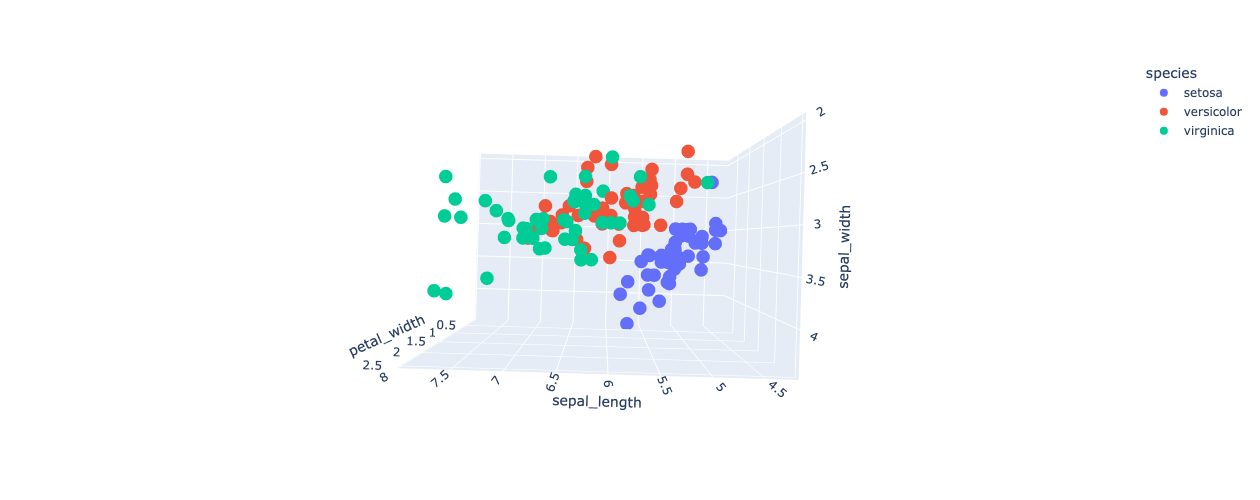

In [114]:
# Configure Plotly to be rendered inline in the notebook.
df = px.data.iris()
fig = px.scatter_3d(
    df, 
    x='sepal_length', 
    y='sepal_width', 
    z='petal_width', 
    color='species',
    height=500,
    width=1000
)
fig.show()

In [108]:
dataset = load_dataset("mstz/heart_failure", "death")
df = pd.DataFrame(dataset['train'])

In [110]:
categorical_columns = ['has_anaemia', 'has_diabetes', 'has_high_blood_pressure', 'is_male', 'is_smoker']
df_numeric = df[df.columns[~df.columns.isin(categorical_columns)]]

In [111]:
y = df_numeric['is_dead']
x = df_numeric.iloc[:, :-1]

In [112]:
df.head()

,age,has_anaemia,creatinine_phosphokinase_concentration_in_blood,has_diabetes,heart_ejection_fraction,has_high_blood_pressure,platelets_concentration_in_blood,serum_creatinine_concentration_in_blood,serum_sodium_concentration_in_blood,is_male,is_smoker,days_in_study,is_dead
0,75,False,582.0,False,20.0,True,265000.00,1.9,130.0,True,False,4,1
1,55,False,7861.0,False,38.0,False,263358.03,1.1,136.0,True,False,6,1
2,65,False,146.0,False,20.0,False,162000.00,1.3,129.0,True,True,7,1
3,50,True,111.0,False,20.0,False,210000.00,1.9,137.0,True,False,7,1
4,65,True,160.0,True,20.0,False,327000.00,2.7,116.0,False,False,8,1


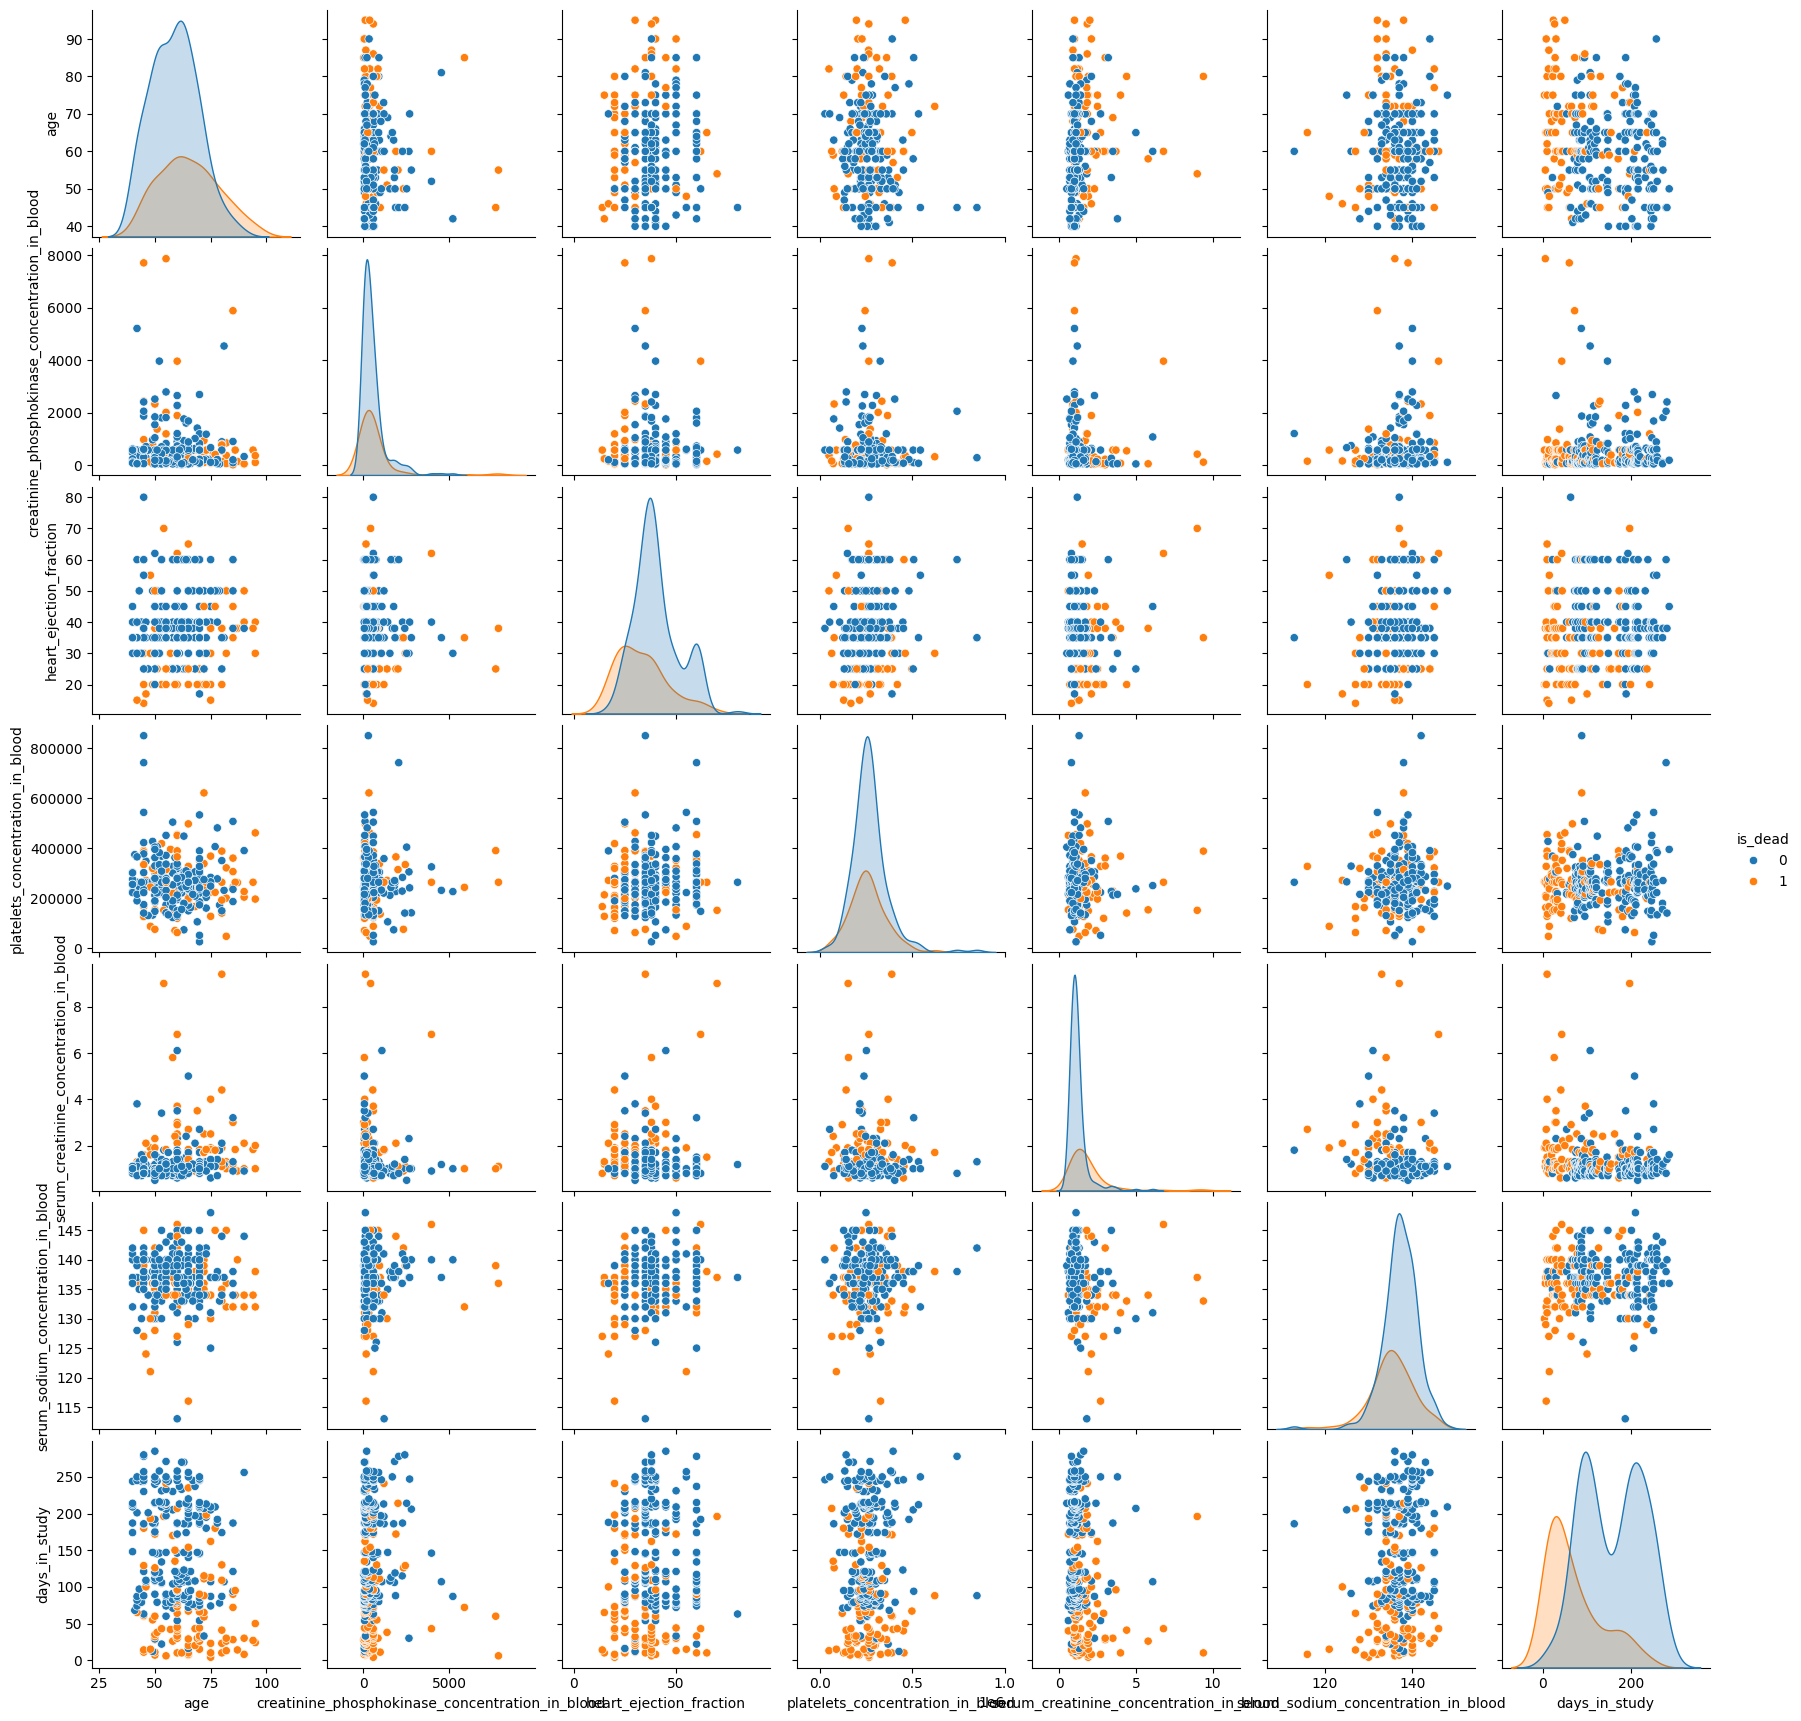

In [16]:
sns.pairplot(df_numeric, hue="is_dead", diag_kind = 'kde');

## How PCA is done!

$$ max||Xu||^{2} \hspace{0.25cm} s.t. \hspace{0.25cm} u^{T}u = 1 $$

$$ \mathcal{L} (u, \lambda) = ||Xu||^{2} - \lambda(u^{T}u - 1)$$

$$ \frac{d}{du} = 2X^{T}X - 2\lambda u $$

$$ 2X^{T}X - 2\lambda u = 0 $$

$$ 2X^{T}X = 2\lambda u $$

$$ X^{T}X = \lambda u $$ 

## Your Favorites: Eigenvalues and Eigenvectors

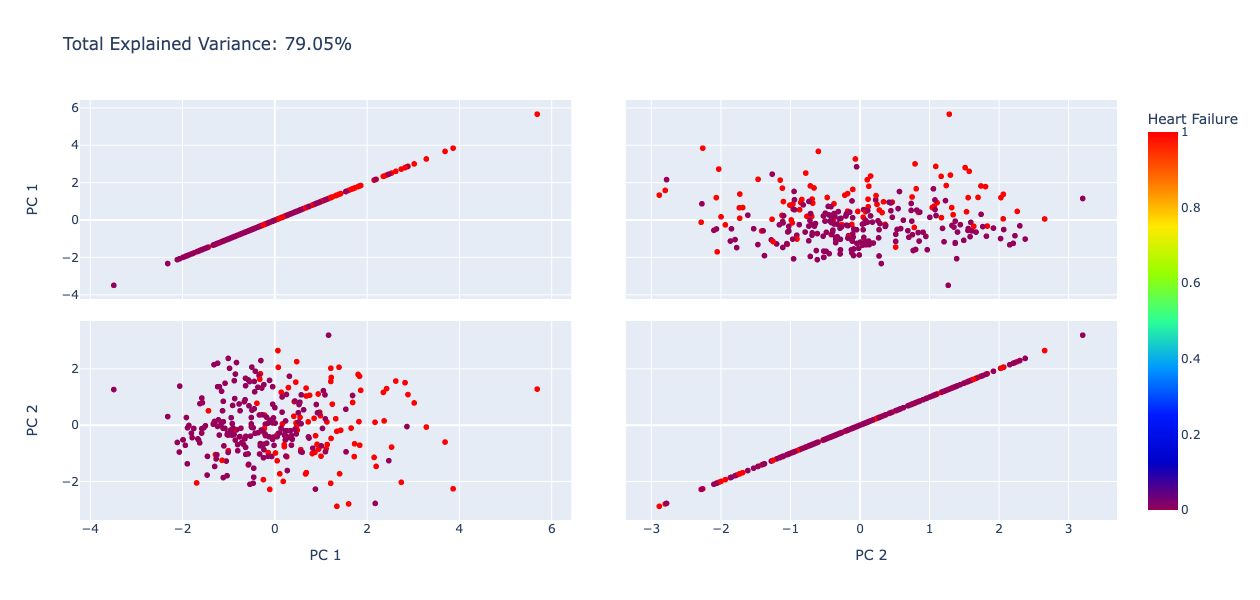

In [113]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

n_components = 5
pca = PCA(n_components = n_components)
components = pca.fit_transform(x_scaled)

total_var = pca.explained_variance_ratio_.sum() * 100

labels = {str(i): f"PC {i+1}" for i in range(2)}
labels['color'] = 'Heart Failure'

fig = px.scatter_matrix(
    components[:, [0,1]],
    color=y,
    dimensions=range(2),
    labels=labels,
    title=f'Total Explained Variance: {total_var:.2f}%',
    width=1000, height=600,
    color_continuous_scale=px.colors.sequential.Rainbow
)
fig.update_traces(diagonal_visible=True)
fig.show()

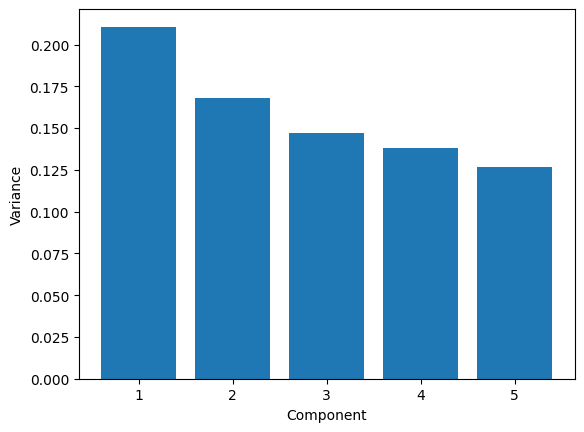

In [106]:
plt.bar(height=pca.explained_variance_ratio_, x=[1,2,3,4,5])
plt.ylabel('Variance')
plt.xlabel('Component')
plt.show();

In [ ]:
number of columnns = 10
number of rows = 7